In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from keras import layers
from keras.layers import SimpleRNN, LSTM, Bidirectional
from keras.models import Sequential
import matplotlib.pyplot as plt

In [25]:
imdb.get_word_index(path="imdb_word_index.json")

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [26]:
max_features = 10000
maxlen = 500

In [27]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [29]:
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

In [32]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [56]:
def evaluate(model, x_train, x_test, y_train, y_test):
    print("Evaluating on training set...")
    (loss, accuracy) = model.evaluate(x_train, y_train, verbose=0)
    print("loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

    print("Evaluating on testing set...")
    (loss, accuracy) = model.evaluate(x_test, y_test, verbose=0)
    print("loss={:.4f}, accuracy: {:.4f}%".format(loss, accuracy * 100))

In [57]:
def plot_results(results):
    plt.subplot(211)
    plt.plot(results.history['acc'])
    plt.plot(results.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])

    plt.subplot(212)
    plt.plot(results.history['loss'])
    plt.plot(results.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.tight_layout()

    max_loss = np.max(results.history['loss'])
    min_loss = np.min(results.history['loss'])
    print("Maximum Loss : {:.4f}".format(max_loss))
    print("Minimum Loss : {:.4f}".format(min_loss))
    print("Loss difference : {:.4f}".format((max_loss - min_loss)))

In [44]:
print('SimpleRNN')

SimpleRNN


In [80]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.SimpleRNN(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [81]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [82]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 128)         1280000   
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 32)                5152      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,285,185
Trainable params: 1,285,185
Non-trainable params: 0
_________________________________________________________________


In [83]:
results = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 39s 243ms/step - loss: 0.6250 - acc: 0.6417 - val_loss: 0.5189 - val_acc: 0.7656
Epoch 2/10
157/157 [==============================] - 38s 240ms/step - loss: 0.4356 - acc: 0.8088 - val_loss: 0.4529 - val_acc: 0.8046
Epoch 3/10
157/157 [==============================] - 38s 241ms/step - loss: 0.3428 - acc: 0.8608 - val_loss: 0.4040 - val_acc: 0.8438
Epoch 4/10
157/157 [==============================] - 38s 242ms/step - loss: 0.2454 - acc: 0.9062 - val_loss: 0.6347 - val_acc: 0.6860
Epoch 5/10
157/157 [==============================] - 38s 241ms/step - loss: 0.1549 - acc: 0.9463 - val_loss: 0.6424 - val_acc: 0.7346
Epoch 6/10
157/157 [==============================] - 38s 240ms/step - loss: 0.0914 - acc: 0.9727 - val_loss: 0.6091 - val_acc: 0.8062
Epoch 7/10
157/157 [==============================] - 38s 241ms/step - loss: 0.0598 - acc: 0.9829 - val_loss: 0.6710 - val_acc: 0.7984
Epoch 8/10
157/157 [==============================] - 3

In [84]:
evaluate(model, x_train, x_test, y_train, y_test)

Evaluating on training set...
loss=0.2094, accuracy: 94.3320%
Evaluating on testing set...
loss=0.9744, accuracy: 73.6000%


Maximum Loss : 0.6250
Minimum Loss : 0.0308
Loss difference : 0.5942


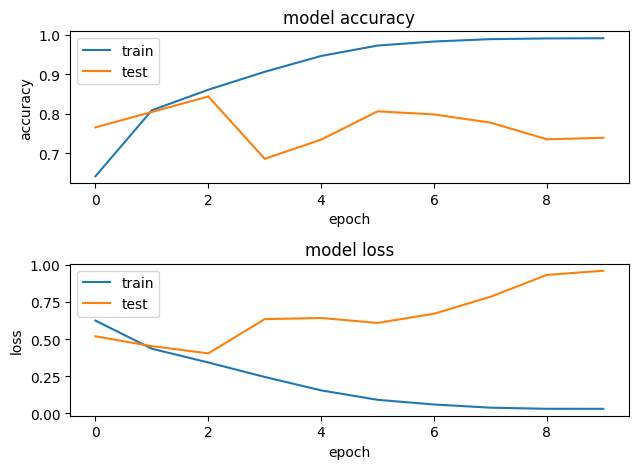

In [85]:
plot_results(results)

In [39]:
print('LSTM')

LSTM


In [77]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

In [78]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [79]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 128)         1280000   
                                                                 
 lstm_3 (LSTM)               (None, 32)                20608     
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,300,641
Trainable params: 1,300,641
Non-trainable params: 0
_________________________________________________________________


In [43]:
results = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 65s 407ms/step - loss: 0.6059 - acc: 0.6539 - val_loss: 0.5419 - val_acc: 0.7198
Epoch 2/10
157/157 [==============================] - 65s 411ms/step - loss: 0.3871 - acc: 0.8403 - val_loss: 0.3359 - val_acc: 0.8704
Epoch 3/10
157/157 [==============================] - 68s 435ms/step - loss: 0.3080 - acc: 0.8811 - val_loss: 0.3114 - val_acc: 0.8790
Epoch 4/10
157/157 [==============================] - 69s 438ms/step - loss: 0.2666 - acc: 0.9013 - val_loss: 0.3278 - val_acc: 0.8698
Epoch 5/10
157/157 [==============================] - 69s 439ms/step - loss: 0.2371 - acc: 0.9122 - val_loss: 0.3591 - val_acc: 0.8762
Epoch 6/10
157/157 [==============================] - 69s 439ms/step - loss: 0.2119 - acc: 0.9234 - val_loss: 0.3596 - val_acc: 0.8640
Epoch 7/10
157/157 [==============================] - 69s 442ms/step - loss: 0.2021 - acc: 0.9304 - val_loss: 0.3445 - val_acc: 0.8770
Epoch 8/10
157/157 [==============================] - 6

In [ ]:
#prediction = model.predict(x_test)

In [49]:
evaluate(model, x_train, x_test, y_train, y_test)

Evaluating on training set...
loss=0.1736, accuracy: 94.2640%
Evaluating on testing set...
loss=0.4371, accuracy: 84.0600%


Maximum Loss : 0.6059
Minimum Loss : 0.1504
Loss difference : 0.4555


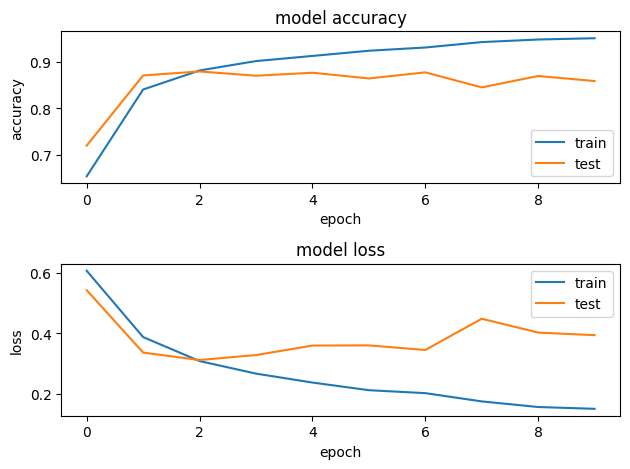

In [58]:
plot_results(results)

In [59]:
print('Bidirectional')

Bidirectional


In [67]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [69]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               41216     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,321,281
Trainable params: 1,321,281
Non-trainable params: 0
_________________________________________________________________


In [70]:
results = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 144s 903ms/step - loss: 0.6283 - acc: 0.6296 - val_loss: 0.4924 - val_acc: 0.7878
Epoch 2/10
157/157 [==============================] - 138s 881ms/step - loss: 0.4145 - acc: 0.8274 - val_loss: 0.3799 - val_acc: 0.8426
Epoch 3/10
157/157 [==============================] - 140s 890ms/step - loss: 0.3235 - acc: 0.8745 - val_loss: 0.4679 - val_acc: 0.7770
Epoch 4/10
157/157 [==============================] - 140s 893ms/step - loss: 0.2773 - acc: 0.8977 - val_loss: 0.3080 - val_acc: 0.8800
Epoch 5/10
157/157 [==============================] - 141s 897ms/step - loss: 0.2352 - acc: 0.9159 - val_loss: 0.4601 - val_acc: 0.8314
Epoch 6/10
157/157 [==============================] - 141s 896ms/step - loss: 0.2093 - acc: 0.9252 - val_loss: 0.3769 - val_acc: 0.8698
Epoch 7/10
157/157 [==============================] - 140s 895ms/step - loss: 0.1910 - acc: 0.9333 - val_loss: 0.3492 - val_acc: 0.8768
Epoch 8/10
157/157 [============================

In [71]:
evaluate(model, x_train, x_test, y_train, y_test)

Evaluating on training set...
loss=0.1524, accuracy: 95.0800%
Evaluating on testing set...
loss=0.4065, accuracy: 84.8560%


Maximum Loss : 0.6283
Minimum Loss : 0.1377
Loss difference : 0.4905


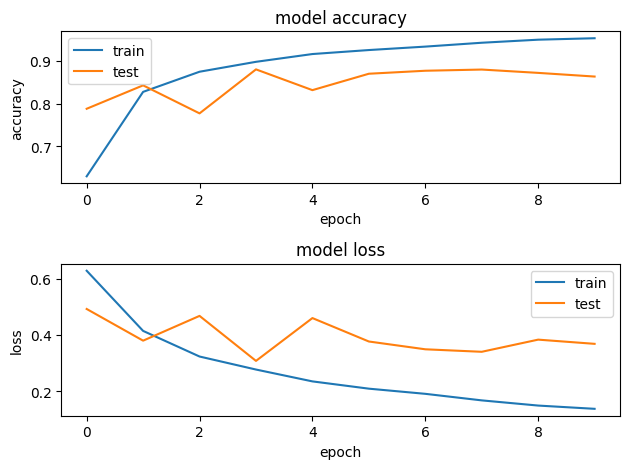

In [72]:
plot_results(results)

In [ ]:
print('max_features X 2 times')

In [ ]:
max_features = 20000
maxlen = 500

In [86]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

In [87]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [88]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 128)         1280000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1,321,281
Trainable params: 1,321,281
Non-trainable params: 0
_________________________________________________________________


In [89]:
results = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 149s 935ms/step - loss: 0.6327 - acc: 0.6266 - val_loss: 0.5862 - val_acc: 0.6858
Epoch 2/10
157/157 [==============================] - 146s 932ms/step - loss: 0.4592 - acc: 0.8090 - val_loss: 0.3810 - val_acc: 0.8460
Epoch 3/10
157/157 [==============================] - 147s 938ms/step - loss: 0.3365 - acc: 0.8708 - val_loss: 0.3393 - val_acc: 0.8734
Epoch 4/10
157/157 [==============================] - 147s 940ms/step - loss: 0.3257 - acc: 0.8867 - val_loss: 0.8758 - val_acc: 0.7492
Epoch 5/10
157/157 [==============================] - 148s 942ms/step - loss: 0.2589 - acc: 0.9067 - val_loss: 0.3601 - val_acc: 0.8574
Epoch 6/10
157/157 [==============================] - 148s 941ms/step - loss: 0.2389 - acc: 0.9155 - val_loss: 0.3255 - val_acc: 0.8798
Epoch 7/10
157/157 [==============================] - 148s 942ms/step - loss: 0.2134 - acc: 0.9273 - val_loss: 0.5584 - val_acc: 0.8270
Epoch 8/10
157/157 [============================

In [90]:
evaluate(model, x_train, x_test, y_train, y_test)

Evaluating on training set...
loss=0.1568, accuracy: 95.2320%
Evaluating on testing set...
loss=0.4302, accuracy: 86.2000%


Maximum Loss : 0.6327
Minimum Loss : 0.1612
Loss difference : 0.4715


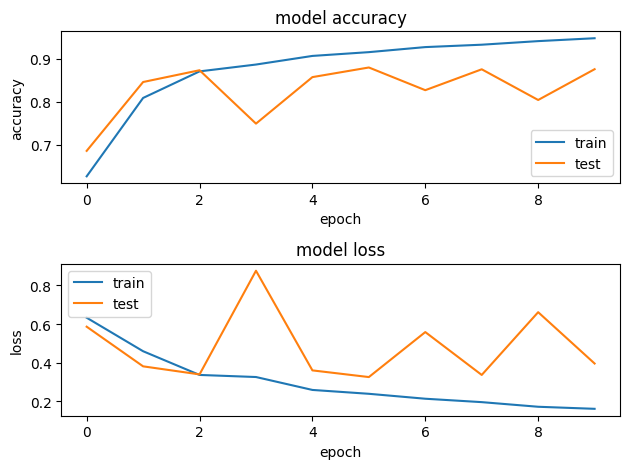

In [91]:
plot_results(results)